<a href="https://colab.research.google.com/github/StillWork/ds-lab/blob/master/gg_17(1)_%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%83%90%EC%83%89_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 탐색
==

다루는 내용
--
- 데이터 특성 보기, 데이터 탐색, 시각화
- 클러스터링

데이터
--
- 전력판매량(시도별/용도별) 액셀 파일 https://goo.gl/Cx8Rzw
- 위 자료는 전력거래소에서 받은 자료임
- 이 파일을 현재 작업중인 (쥬피터 노트북이 실행되는) 폴더 아래에 data 폴더를 만들고 data 폴더로 복사한다

필요한 라이브러리(모듈) 설치
--

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [8]:
# 데이터 다운로드
# import os, os.path, shutil
# if not os.path.exists("./data"):
#     os.makedirs("./data")
!curl -L https://goo.gl/Cx8Rzw -o ./data/power.xls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0

  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0

100   990    0   990    0     0    460      0 --:--:--  0:00:02 --:--:--   460
100   990    0   990    0     0    460      0 --:--:--  0:00:02 --:--:--     0

100 17920  100 17920    0     0   7460      0  0:00:02  0:00:02 --:--:--  7460


In [7]:
# 한글 폰트 설치
!apt-get install fonts-nanum*
!apt-get install fontconfig
!fc-cache -fv
!cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
!rm -rf /content/.cache/matplotlib/*

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fontconfig is already the newest version (2.12.6-0ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetyp

In [0]:
import matplotlib
matplotlib.font_manager._rebuild()

In [0]:
# tree
!apt-get install tree
!tree -d .

데이터 읽기
--

In [9]:
power_data = pd.read_excel('data/power.xls')
print(power_data.shape)

(19, 28)


In [13]:
power_data

,구분,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
0,강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,...,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
1,개성,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,...,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859
3,경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,...,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580,34647864
4,경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,...,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631,45455611
5,광주,1954876,565527,3174973,3740500,74608,2898,2910768,161072,295922,...,198847,5967,236622,723764,512148,5140,13392,16049,2988274,8683649
6,대구,3151904,826396,5470438,6296834,69142,5858,5862633,212626,1057342,...,516493,58446,180189,252662,1381273,68127,41814,33616,5937633,15386372
7,대전,1872890,954681,3955921,4910602,28643,3326,2608343,204171,41687,...,77970,2949,83609,474561,218191,5439,31657,2252,2640312,9423804
8,부산,4473510,1305876,7582169,8888045,107927,25289,7512588,532943,528513,...,904149,4913,107717,90644,1046529,231141,49733,13104,7645804,21007358
9,서울,13131172,3581534,27647345,31228879,15150,4064,1918893,227077,497699,...,163688,4395,11425,46225,20182,17656,132707,2875,1938107,46298158


In [14]:
power_data.columns

Index(['구분', '주거용', '공공용', '서비스업', '업무용합계', '농림어업', '광업', '제조업', '식료품제조',
       '섬유,의류', '목재,나무', '펄프,종이', '출판,인쇄', '석유,화확', '의료,광학', '요업', '1차금속',
       '조립금속', '기타기계', '사무기기', '전기기기', '영상,음향', '자동차', '기타운송', '가구및기타', '재생재료',
       '산업용합계', '합계'],
      dtype='object')

In [40]:
power = power_data.set_index('구분')

In [41]:
power = power.drop(['합계', '개성'], errors='ignore')

In [26]:
power.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 강원 to 충북
Data columns (total 27 columns):
주거용      17 non-null int64
공공용      17 non-null int64
서비스업     17 non-null int64
업무용합계    17 non-null int64
농림어업     17 non-null int64
광업       17 non-null int64
제조업      17 non-null int64
식료품제조    17 non-null int64
섬유,의류    17 non-null int64
목재,나무    17 non-null int64
펄프,종이    17 non-null int64
출판,인쇄    17 non-null int64
석유,화확    17 non-null int64
의료,광학    17 non-null int64
요업       17 non-null int64
1차금속     17 non-null int64
조립금속     17 non-null int64
기타기계     17 non-null int64
사무기기     17 non-null int64
전기기기     17 non-null int64
영상,음향    17 non-null int64
자동차      17 non-null int64
기타운송     17 non-null int64
가구및기타    17 non-null int64
재생재료     17 non-null int64
산업용합계    17 non-null int64
합계       17 non-null int64
dtypes: int64(27)
memory usage: 3.7+ KB


In [28]:
power.isnull().sum()

주거용      0
공공용      0
서비스업     0
업무용합계    0
농림어업     0
광업       0
제조업      0
식료품제조    0
섬유,의류    0
목재,나무    0
펄프,종이    0
출판,인쇄    0
석유,화확    0
의료,광학    0
요업       0
1차금속     0
조립금속     0
기타기계     0
사무기기     0
전기기기     0
영상,음향    0
자동차      0
기타운송     0
가구및기타    0
재생재료     0
산업용합계    0
합계       0
dtype: int64

데이터 특성 보기
--
- boxplot
- barplot
- histogram
- scatterplot

박스플롯
--

한글 폰트 설정 (맥, 윈도우, 리눅스)
--

In [29]:
# 운영 체제마다 한글이 보이게 하는 설정
# 윈도우
from matplotlib import font_manager, rc
import platform
if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# # 맥
# elif platform.system() == 'Darwin':
#     rc('font', family='AppleGothic')
# # 리눅스
# elif platform.system() == 'Linux':
#     rc('font', family='NanumBarunGothic')
# else:
#     print('system error...')

In [31]:
power.describe()

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
count,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,...,1.700000e+01,17.000000,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,1.700000e+01,1.700000e+01
mean,3.912786e+06,1.388502e+06,8.291312e+06,9.679813e+06,9.400665e+05,102720.176471,1.523205e+07,6.636738e+05,6.623886e+05,113237.000000,...,6.199825e+05,28781.235294,3.412887e+05,2.805870e+06,1.053153e+06,2.600299e+05,2.005222e+05,33137.000000,1.627484e+07,2.986743e+07
std,4.310227e+06,1.298531e+06,8.708909e+06,9.981623e+06,1.010972e+06,122502.337918,1.524290e+07,6.333206e+05,9.612365e+05,192034.155445,...,9.142491e+05,75569.163261,3.788489e+05,6.246070e+06,1.031256e+06,5.260199e+05,4.450945e+05,38105.462924,1.598920e+07,2.618055e+07
min,3.849030e+05,2.996750e+05,6.454240e+05,9.450990e+05,1.515000e+04,2898.000000,2.415370e+05,1.102110e+05,3.497000e+03,1324.000000,...,1.167000e+03,0.000000,7.710000e+02,0.000000e+00,7.730000e+02,0.000000e+00,1.743000e+03,743.000000,1.588755e+06,2.918758e+06
25%,1.940933e+06,8.263960e+05,3.955921e+06,4.910602e+06,7.460800e+04,14019.000000,2.910768e+06,2.041710e+05,7.589500e+04,6782.000000,...,7.797000e+04,4395.000000,8.360900e+04,4.622500e+04,1.134480e+05,1.765600e+04,1.339200e+04,2875.000000,2.988274e+06,1.538637e+07
50%,2.326183e+06,1.089613e+06,5.690659e+06,6.654683e+06,6.071390e+05,71529.000000,1.236782e+07,5.329430e+05,3.338460e+05,27998.000000,...,1.988470e+05,7240.000000,1.785020e+05,4.200050e+05,6.128980e+05,6.812700e+04,4.181400e+04,19725.000000,1.258230e+07,2.451531e+07
75%,3.856852e+06,1.400421e+06,7.582169e+06,8.888045e+06,1.747462e+06,139856.000000,2.145393e+07,9.327430e+05,7.316510e+05,72680.000000,...,7.825700e+05,14319.000000,4.289060e+05,1.124564e+06,2.156059e+06,1.239350e+05,1.327070e+05,46038.000000,2.462327e+07,3.464786e+07
max,1.658771e+07,5.533662e+06,3.343455e+07,3.896821e+07,3.096126e+06,398287.000000,5.660333e+07,2.544420e+06,3.780171e+06,639429.000000,...,3.613798e+06,317244.000000,1.125141e+06,2.451964e+07,2.977165e+06,2.048646e+06,1.833112e+06,133041.000000,5.929194e+07,1.148479e+08


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24]), <a list of 24 Text xticklabel objects>)

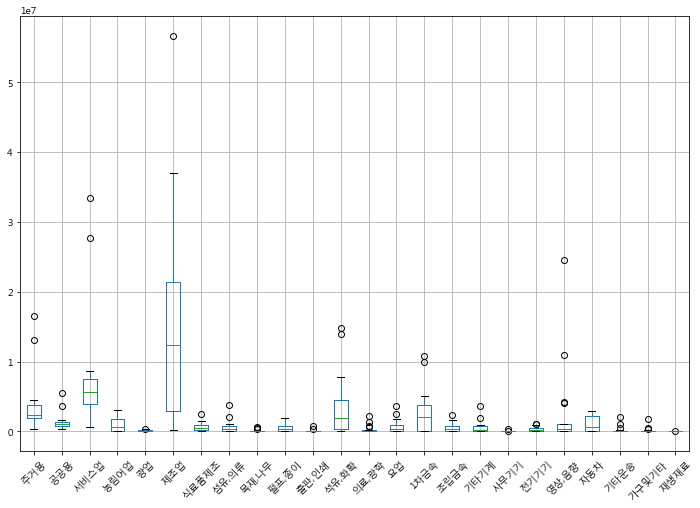

In [42]:
power.drop(['업무용합계','산업용합계','합계'], axis=1).boxplot(figsize=(12,8))
plt.xticks(rotation=45)

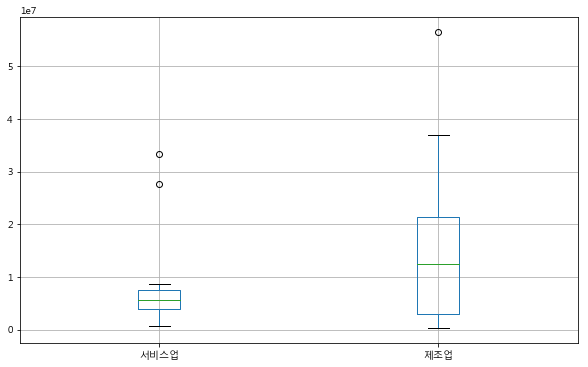

In [43]:
power[['서비스업','제조업']].boxplot(figsize=(10,6))

바 플롯 (수평형)
--

In [44]:
power = power.drop(['업무용합계','산업용합계','합계'], axis=1)

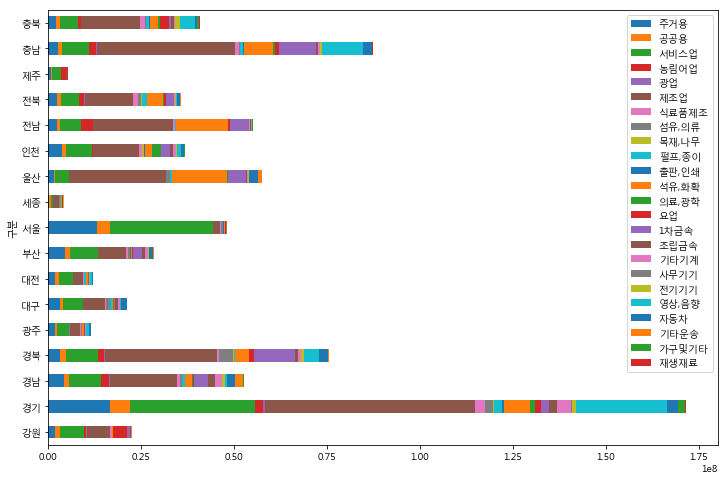

In [50]:
power.plot(kind='barh', figsize=(12,8), stacked=True)

In [0]:
power = power.drop(['합계', '개성'], errors='ignore')

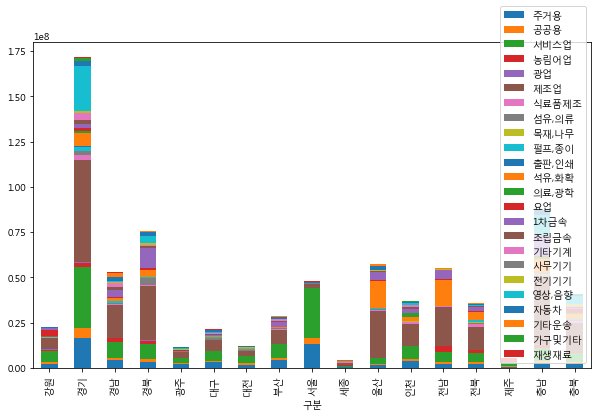

In [53]:
power.plot(kind='bar', figsize=(10,6), stacked=True)

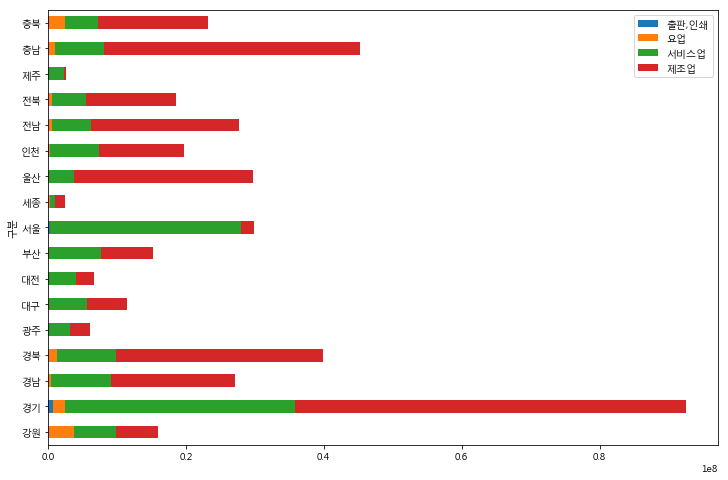

In [54]:
sample = ['출판,인쇄', '요업', '서비스업', '제조업']
power[sample].plot(kind='barh', figsize=(12,8), stacked=True)

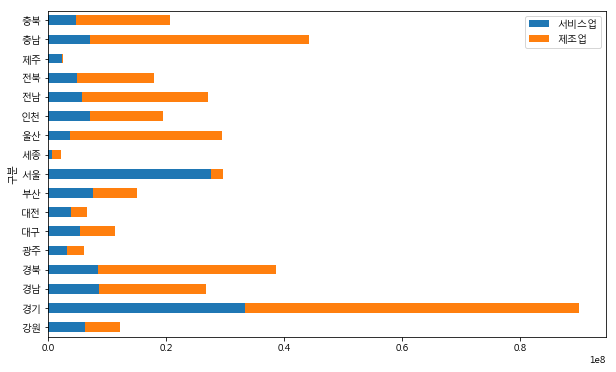

In [55]:
see2 = ['서비스업','제조업']
power[see2].plot(kind='barh', figsize=(10,6), stacked=True)

In [56]:
power = power[['서비스업', '제조업']]
power.head(5)

,서비스업,제조업
구분,,
강원,6203749,6002286
경기,33434551,56603327
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768


히스토그램
--

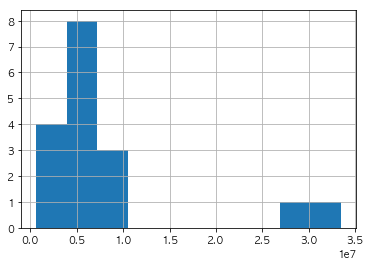

In [0]:
power['서비스업'].hist()

스캐터 플롯
--

In [0]:
print(power.shape)

(17, 2)


In [17]:
n_samples = power.shape[0]
n_samples

17

In [62]:
print(n_samples)

17


In [63]:
power.index

Index(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천',
       '전남', '전북', '제주', '충남', '충북'],
      dtype='object', name='구분')

Text(0, 0.5, '제조업')

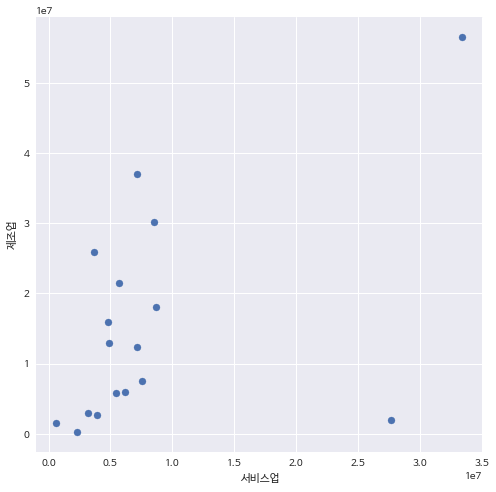

In [18]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'])
plt.xlabel('서비스업')
plt.ylabel('제조업')

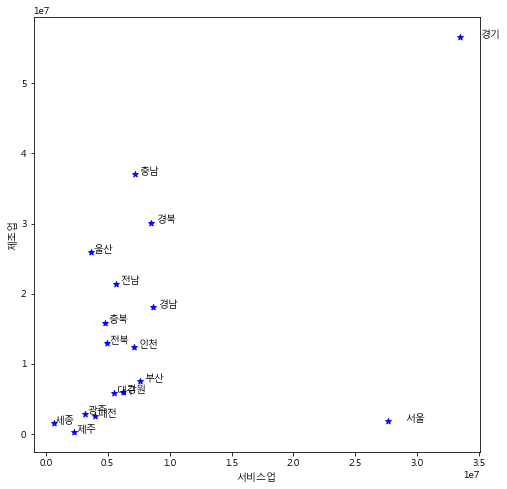

In [68]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'],c='b',marker='*')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.05, power['제조업'][n]*1, power.index[n])

In [81]:
power = power.drop(['경기', '서울'])

KeyError: "['경기' '서울'] not found in axis"

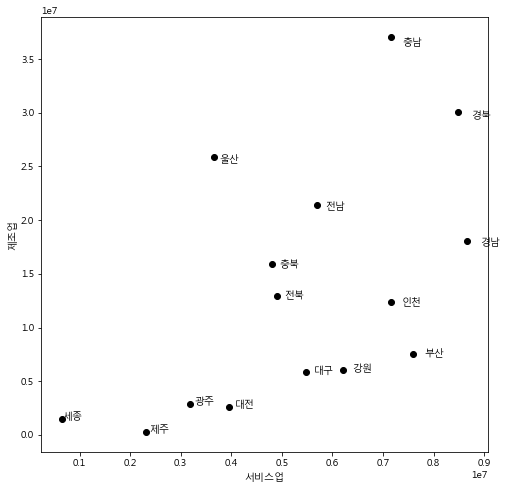

In [70]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'],c='k',marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])

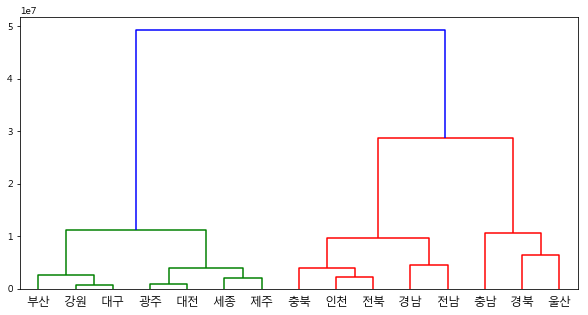

In [73]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
link_dist = linkage(power, metric='euclidean', method='ward')  
dendrogram(link_dist, labels=power.index)
plt.show()

In [91]:
from sklearn.cluster import KMeans
k = KMeans(n_clusters=6).fit(power)
print(k.n_clusters)

6


In [92]:
k.labels_

array([4, 1, 3, 0, 4, 0, 4, 0, 3, 5, 1, 5, 0, 2, 5])

In [93]:
k.cluster_centers_

array([[ 2521262.5       ,  1815892.5       ],
       [ 7179198.        , 19753852.        ],
       [ 7164439.        , 37057955.        ],
       [ 6068394.        , 27999366.5       ],
       [ 6418785.33333333,  6459169.        ],
       [ 5623124.        , 13739046.33333333]])

In [95]:
power['클러스터'] = k.labels_
power.head(10)

,서비스업,제조업,클러스터
구분,,,
강원,6203749,6002286,4
경남,8667737,18053778,1
경북,8487402,30115601,3
광주,3174973,2910768,0
대구,5470438,5862633,4
대전,3955921,2608343,0
부산,7582169,7512588,4
세종,645424,1502922,0
울산,3649386,25883132,3


In [96]:
power.drop('클러스터', axis = 1, inplace=True) ; power.head()

,서비스업,제조업
구분,,
강원,6203749,6002286
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768
대구,5470438,5862633


In [100]:
centers = k.cluster_centers_ ;

7179198.0

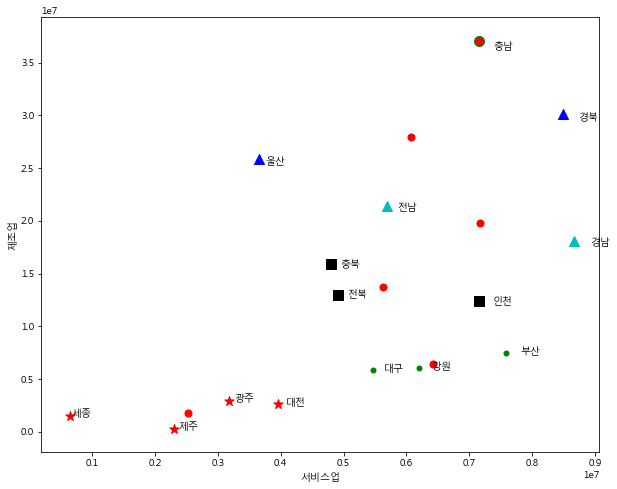

In [98]:
my_markers=['*','^', 'o','^','.',',','1','2']
my_color =['r','c','g','b','g','k','r','y']

plt.figure(figsize=(10, 8))
plt.xlabel('서비스업')
plt.ylabel('제조업')
for n in range(power.shape[0]):
    label = k.labels_[n]
    plt.scatter(power['서비스업'][n], power['제조업'][n], c=my_color[label], 
                marker=my_markers[label], s=100)
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])
    
for i in range(k.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c = 'r', s= 50)

In [120]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
power[['서비스업', '제조업']] = scaler.fit_transform(power[['서비스업', '제조업']])
power

,서비스업,제조업
구분,,
강원,0.393992,-0.676282
경남,1.498349,0.431200
경북,1.417523,1.539632
광주,-0.963503,-0.960380
대구,0.065323,-0.689116
대전,-0.613482,-0.988171
부산,1.011798,-0.537491
세종,-2.097244,-1.089755
울산,-0.750871,1.150686


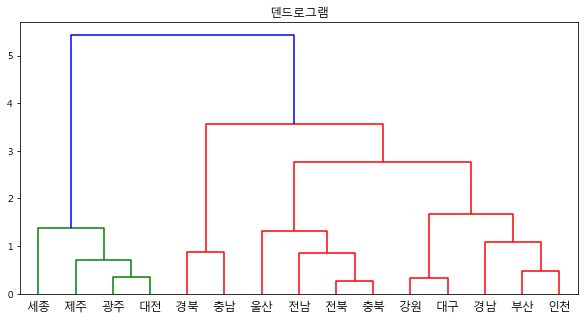

In [104]:
Z = linkage(power, metric='euclidean', method='ward') 
# 유클리드 거리를 이용해 Linkage Matrix를 생성
plt.figure(figsize=(10, 5))
plt.title('덴드로그램')
dendrogram(Z, labels=power.index)
plt.show()

In [0]:
k = KMeans(n_clusters= 4).fit(power)
centers = k.cluster_centers_

<Figure size 432x288 with 0 Axes>

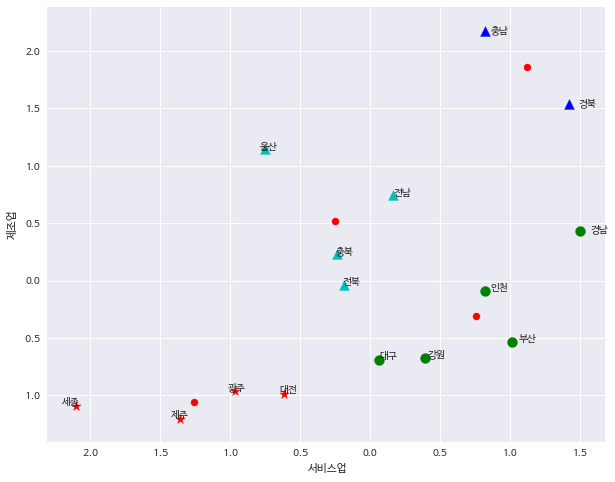

In [79]:
plt.clf()
plt.figure(figsize=(10, 8))
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    label = k.labels_[n]
    plt.scatter(power['서비스업'][n], power['제조업'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(power['서비스업'][n]*1.05, power['제조업'][n]*0.99, power.index[n])
    
for i in range(k.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c = 'r', s= 50)

In [110]:
# 모든 특성 고려
power_data.head().T

,0,1,2,3,4
구분,강원,개성,경기,경남,경북
주거용,1940933,0,16587710,4260988,3302463
공공용,1400421,0,5533662,1427560,1578115
서비스업,6203749,0,33434551,8667737,8487402
업무용합계,7604170,0,38968213,10095297,10065517
농림어업,607139,0,2371347,2141813,1747462
광업,398287,0,317263,95989,224568
제조업,6002286,0,56603327,18053778,30115601
식료품제조,546621,0,2544420,932743,566071
"섬유,의류",13027,0,2109963,346974,3780171


In [111]:
power2 = power_data.set_index('구분')
power2.drop(['업무용합계', '산업용합계', '합계'], axis=1, 
           inplace=True, errors='ignore')
power2.drop(['합계','개성','경기','서울'], inplace=True,errors='ignore')

In [112]:
power2

,주거용,공공용,서비스업,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무","펄프,종이",...,1차금속,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료
구분,,,,,,,,,,,,,,,,,,,,,
강원,1940933,1400421,6203749,607139,398287,6002286,546621,13027,19147,24382,...,1038913,39477,35063,2019,38062,43986,113448,108629,12872,3418
경남,4260988,1427560,8667737,2141813,95989,18053778,932743,346974,60160,817685,...,3809547,1699879,1902913,8070,924235,534196,2156059,2048646,262523,47662
경북,3302463,1578115,8487402,1747462,224568,30115601,566071,3780171,72680,361772,...,10874970,933178,782570,14468,750786,4174971,2356890,123935,60280,77104
광주,1954876,565527,3174973,74608,2898,2910768,161072,295922,6782,41827,...,75702,156396,198847,5967,236622,723764,512148,5140,13392,16049
대구,3151904,826396,5470438,69142,5858,5862633,212626,1057342,16215,445646,...,317580,661307,516493,58446,180189,252662,1381273,68127,41814,33616
대전,1872890,954681,3955921,28643,3326,2608343,204171,41687,4311,539332,...,56535,69342,77970,2949,83609,474561,218191,5439,31657,2252
부산,4473510,1305876,7582169,107927,25289,7512588,532943,528513,51980,27240,...,2426694,872952,904149,4913,107717,90644,1046529,231141,49733,13104
세종,384903,299675,645424,69469,16364,1502922,110211,70617,1324,350896,...,32345,11390,26185,14319,33539,170366,79009,0,5132,2603
울산,1487143,489865,3649386,80221,20103,25883132,187738,943299,12286,620457,...,4671005,393469,169132,5053,381602,24165,2367150,1020610,4984,1626


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


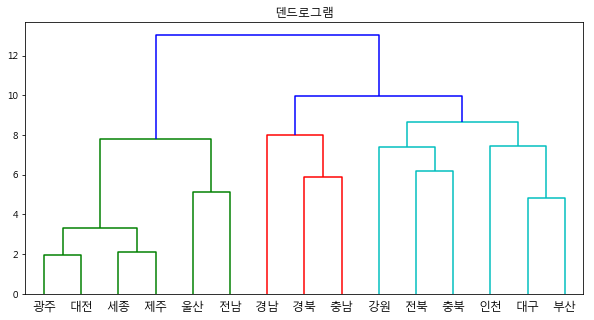

In [113]:
power3 = pd.DataFrame(scaler.fit_transform(power2), columns=power2.columns,
                      index=power2.index)

Z = linkage(power3, metric='euclidean', method='ward') 
# 유클리드 거리를 이용해 Linkage Matrix를 생성
plt.figure(figsize=(10, 5))
plt.title('덴드로그램')
dendrogram(Z, labels=power3.index)
plt.show()

15


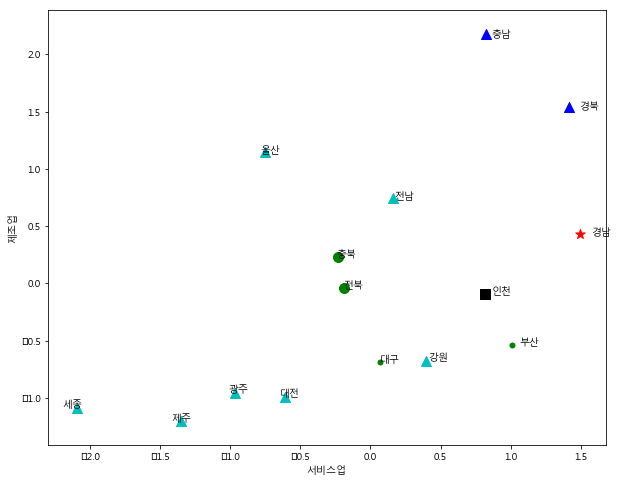

In [119]:
k = KMeans(n_clusters=6).fit(power3)
n_samples = power3.shape[0]
print(n_samples)

plt.figure(figsize=(10, 8))
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(n_samples):
    label = k.labels_[n]
    plt.scatter(power3['서비스업'][n], power3['제조업'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(power3['서비스업'][n]*1.05, power3['제조업'][n]*0.99, power3.index[n])

## 25차원 데이터를 2차원으로 그렸기 때문에 맞지 않는 그래프

In [84]:
power3

,주거용,공공용,서비스업,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무","펄프,종이",...,1차금속,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료
구분,,,,,,,,,,,,,,,,,,,,,
강원,-0.447461,1.107363,0.393992,-0.316151,2.742496,-0.676282,-0.050383,-0.616388,-0.451440,-1.067457,...,-0.545482,-0.948359,-0.828941,-0.656697,-0.830062,-0.527178,-0.976346,-0.336181,-0.556318,-0.886117
경남,1.578961,1.176534,1.498349,1.305632,0.008994,0.431200,0.885979,-0.251316,-0.199913,1.028648,...,0.272688,2.649920,2.895248,-0.222754,1.809963,-0.354695,1.289121,3.279342,1.110336,0.677332
경북,0.741750,1.560268,1.417523,0.888898,1.171658,1.539632,-0.003216,3.501870,-0.123130,-0.175988,...,2.359112,0.988392,0.661467,0.236074,1.293236,0.926336,1.511864,-0.307656,-0.239826,1.717722
광주,-0.435282,-1.020610,-0.963503,-0.878909,-0.832773,-0.960380,-0.985356,-0.307126,-0.527273,-1.021363,...,-0.829919,-0.694982,-0.502382,-0.373569,-0.238525,-0.287994,-0.534146,-0.529049,-0.552847,-0.439775
대구,0.610246,-0.355709,0.065323,-0.884685,-0.806008,-0.689116,-0.860335,0.525262,-0.469421,0.045628,...,-0.758493,0.399217,0.130952,3.389922,-0.406647,-0.453754,0.429803,-0.411663,-0.363103,0.180989
대전,-0.506892,-0.028737,-0.613482,-0.927483,-0.828903,-0.988171,-0.880839,-0.585057,-0.542427,0.293170,...,-0.835579,-0.883638,-0.743391,-0.590002,-0.694371,-0.375678,-0.860175,-0.528492,-0.430911,-0.927319
부산,1.764586,0.866387,1.011798,-0.843699,-0.630305,-0.537491,-0.083553,-0.052856,-0.250080,-1.059906,...,-0.135670,0.857876,0.903875,-0.449156,-0.622550,-0.510761,0.058538,-0.107861,-0.310237,-0.543843
세종,-1.806555,-1.698213,-2.097244,-0.884340,-0.711008,-1.089755,-1.108696,-0.553430,-0.560746,-0.204725,...,-0.842723,-1.009226,-0.846642,0.225388,-0.843536,-0.482711,-1.014542,-0.538628,-0.607990,-0.914916
울산,-0.843818,-1.213457,-0.750871,-0.872977,-0.677199,1.150686,-0.920690,0.400589,-0.493517,0.507522,...,0.527077,-0.181218,-0.561629,-0.439116,0.193389,-0.534153,1.523243,1.363437,-0.608978,-0.949440
